In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# Split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data to add a single channel (since the images are grayscale)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Normalize the pixel values (from 0-255 to 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Build the CNN model
model = models.Sequential()

# First convolutional layer (32 filters, 3x3 kernel)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer (64 filters, 3x3 kernel)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output before feeding it into fully connected layers
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 neurons (one for each class)
model.add(layers.Dense(10, activation='softmax'))

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.8576 - loss: 0.4705 - val_accuracy: 0.9754 - val_loss: 0.0815
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9803 - loss: 0.0654 - val_accuracy: 0.9827 - val_loss: 0.0575
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9866 - loss: 0.0445 - val_accuracy: 0.9867 - val_loss: 0.0477
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.9890 - loss: 0.0341 - val_accuracy: 0.9855 - val_loss: 0.0471
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 53ms/step - accuracy: 0.9918 - loss: 0.0264 - val_accuracy: 0.9868 - val_loss: 0.0464
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9934 - loss: 0.0199 - val_accuracy: 0.9897 - val_loss: 0.0412
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9949 - loss: 0.0147 - val_accuracy: 0.9878 - val_loss: 0.0454
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9960 - loss: 0.0131 - 

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9877 - loss: 0.0425
Test accuracy: 0.9897000193595886


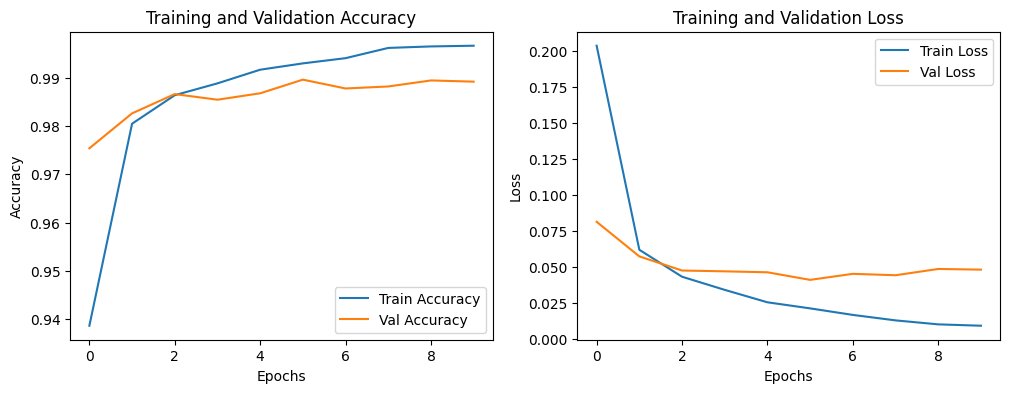

In [ ]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
